<a href="https://colab.research.google.com/github/ZeroFiles/AML-Final-Ortiz-Larry/blob/main/notebooks/AML_final_project_Larry_Ortiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Capstone Project - Advanced Machine Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombre del Estudiante** | Larry W. Ortiz Fernandez |
| **Título del Proyecto** | Modelo de predicción para asignación de flota para última milla  |
| **Fecha de Entrega** | 19/02/2026 |
| **Profesor** | Carlos Mariño del Rosario |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

**Instrucciones:** Proporcione un resumen conciso (máximo 300 palabras) que incluya:
- Problema de negocio abordado
- Metodología utilizada
- Principales hallazgos
- Impacto esperado en el negocio

---

## 1. Resumen Ejecutivo

En el presente proyecto, desarrollado en el contexto de una empresa del sector FoodTech dedicada a servicios de última milla y distribución bajo demanda, se identifica como problemática central la baja eficiencia operativa asociada a una planificación reactiva de su flota de motorizados. La organización opera en un entorno de alta variabilidad de demanda, donde la asignación inadecuada de recursos genera sobrecostos, tiempos muertos y fluctuaciones en el nivel de servicio.

Para abordar esta situación, se propone la implementación de un modelo predictivo basado en técnicas de Advanced Machine Learning, orientado a estimar la demanda futura por punto operativo y franja horaria. El modelo integra variables históricas de pedidos, patrones estacionales, comportamiento temporal y factores operativos, empleando algoritmos como Gradient Boosting y Random Forest para capturar relaciones no lineales y dinámicas complejas en los datos.

Las predicciones generadas permiten dimensionar de manera anticipada el requerimiento óptimo de flota, alineando la oferta de motorizados con la demanda esperada. Con ello, se reduce la brecha entre capacidad instalada y pedidos reales, se optimiza la utilización de recursos y se minimizan tiempos improductivos.

De esta manera, el modelo predictivo se constituye como un mecanismo estructural de mejora, permitiendo evolucionar desde una gestión operativa reactiva hacia una planificación basada en analítica avanzada, con impacto directo en la eficiencia operativa y sostenibilidad financiera de la organización.





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [ ]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

✅ GPU disponible: Tesla T4
   Memoria GPU: 15.64 GB

Dispositivo seleccionado: cuda


### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [ ]:
# Descomente e instale las librerías adicionales que necesite
# !pip install transformers
# !pip install pytorch-lightning
# !pip install optuna
# !pip install shap
# !pip install lime

### 2.3 Importación de Librerías

In [ ]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("✅ Todas las librerías importadas correctamente")
print(f"   PyTorch version: {torch.__version__}")
print(f"   TensorFlow version: {tf.__version__}")

✅ Todas las librerías importadas correctamente
   PyTorch version: 2.10.0+cu128
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/AML_Final_Project/'

print(f"✅ Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Mounted at /content/drive
✅ Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/AML_Final_Project/


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
- Industria/Sector
- Empresa o caso de estudio
- Situación actual

---

La organización objeto de estudio pertenece al sector FoodTech y logística de última milla, operando bajo un modelo de atención bajo demanda con múltiples puntos operativos. Su propuesta de valor se basa en la rapidez de entrega, flexibilidad operativa y capacidad de respuesta ante variaciones en la demanda diaria y semanal.

El entorno competitivo se caracteriza por:

*   Alta variabilidad en el volumen de pedidos.
*   Sensibilidad al tiempo de entrega.
*   Presión por optimización de costos operativos.
*   Necesidad de decisiones en tiempo casi real.

Actualmente, la planificación de la flota de motorizados se realiza utilizando promedios históricos y ajustes manuales por parte del equipo operativo. Este enfoque, aunque funcional en contextos estables, resulta limitado frente a patrones no lineales, estacionalidades dinámicas y efectos combinados de múltiples variables operativas.

En consecuencia, la organización presenta una brecha entre capacidad instalada y demanda real, generando ineficiencias estructurales en la gestión de recursos.



---

### 3.2 Problema a Resolver

**Instrucciones:** Defina claramente:
- ¿Cuál es el problema específico?
- ¿Por qué es importante resolverlo?
- ¿Cuál es el impacto actual del problema?

---
**¿Cuál es el problema específico?**

La organización no cuenta con un modelo predictivo avanzado que permita estimar con precisión la demanda futura por punto operativo y franja horaria, lo que impide dimensionar de forma óptima la flota de motorizados.

**¿Por qué es importante resolverlo?**

Porque la asignación ineficiente de la flota impacta directamente en:

* Incremento de tiempos muertos.
* Sobrecostos por sobreasignación.
* Riesgo de incumplimiento en picos de demanda.
* Variabilidad en el nivel de servicio.

**¿Cuál es el impacto actual del problema?**

El impacto se traduce en menor eficiencia operativa, mayor costo por pedido y pérdida potencial de competitividad. La gestión reactiva limita la capacidad de anticipación y reduce la madurez analítica de la organización.

Desde una perspectiva estratégica, la ausencia de un enfoque de Advanced Machine Learning restringe la capacidad de explotar el valor de los datos históricos disponibles y de transformar la operación en un sistema predictivo y optimizado.



---

### 3.3 Objetivos del Proyecto

**Instrucciones:** Liste los objetivos SMART (Específicos, Medibles, Alcanzables, Relevantes, Temporales)

---

**Objetivo General:**
Diseñar e implementar un modelo predictivo basado en técnicas de Advanced Machine Learning que permita estimar la demanda operativa futura y optimizar el dimensionamiento de la flota, con el fin de mejorar la eficiencia operativa de la organización.

**Objetivos Específicos:**
1. Desarrollar un modelo de predicción de demanda por punto operativo y franja horaria utilizando algoritmos avanzados (Gradient Boosting, Random Forest y modelos neuronales).
2. Reducir el error de predicción (MAE o RMSE) en al menos un 15% respecto al modelo base histórico en un periodo de validación de 3 meses.
3. Implementar un esquema de traducción de demanda predicha a requerimiento óptimo de flota, permitiendo reducir en al menos 10% los tiempos muertos en un horizonte de 6 meses.

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [ ] Clasificación binaria
- [ ] Clasificación multiclase
- [x] Regresión
- [ ] Clustering
- [x] Series temporales
- [ ] Procesamiento de Lenguaje Natural (NLP)
- [ ] Visión por Computadora
- [ ] Otro: _________

**Justificación:**

El problema principal consiste en estimar una variable continua (cantidad de pedidos esperados o requerimiento de flota), lo que corresponde a un problema de regresión.

Adicionalmente, debido a que los datos presentan dependencia temporal, estacionalidad y patrones dinámicos, el enfoque se enmarca también dentro de modelamiento de series temporales avanzadas, integrando algoritmos de Machine Learning capaces de capturar relaciones no lineales y efectos combinados.

El resultado del modelo de regresión alimenta posteriormente un esquema de optimización operativa, permitiendo convertir la predicción en una decisión accionable de dimensionamiento de flota.

---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [ ]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Opción 1: Cargar desde Google Drive
# df = pd.read_csv(BASE_PATH + 'datos.csv')

# Opción 2: Cargar desde URL
# df = pd.read_csv('https://url-de-sus-datos.com/datos.csv')

# Opción 3: Cargar desde archivo local (subido a Colab)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nombre_archivo.csv')

# Opción 4: Dataset de ejemplo (para testing)
# from sklearn.datasets import load_iris, load_boston, fetch_california_housing
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# =====================================================
# COMPLETE AQUÍ: Cargue su dataset
# =====================================================

# df = pd.read_excel(BASE_PATH + 'dataset.xlsx')
df = pd.read_parquet(BASE_PATH + 'dataset_model.parquet')

print(f"✅ Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Dataset cargado exitosamente
   Dimensiones: 19,393 filas × 28 columnas


### 4.2 Descripción del Dataset

**Instrucciones:** Describa su dataset:
- Fuente de los datos
- Período de tiempo que cubren
- Descripción de cada variable

---
El dataset proviene del sistema transaccional operativo de una empresa del sector FoodTech dedicada a servicios de última milla. La información corresponde a registros históricos de pedidos realizados en distintos puntos operativos (locales), incluyendo información temporal y métricas asociadas al proceso de entrega (distancia recorrida y tiempos de servicio).

Los datos fueron extraídos del sistema productivo, consolidados en un archivo estructurado y posteriormente sometidos a un proceso de ingeniería de variables (feature engineering) para su uso en modelos de Machine Learning orientados a la predicción de demanda.


| Variable | Tipo | Descripción |
|----------|------|-------------|
| local |	categórica	| Identificador del punto operativo donde se generó la demanda.|
ts_hour	|temporal	|Timestamp agregado a nivel hora que representa la franja horaria de análisis.
pedidos	|numérica (entero)	|Número de pedidos registrados en el local durante la hora correspondiente. Variable objetivo (target).
km_mean	|numérica continua	|Distancia promedio recorrida (en km) por pedido durante esa hora en el local.
t_ret_mean	|numérica continua	|Tiempo promedio (minutos) de entrega y retorno por pedido en esa hora.
t_ret_p75	|numérica continua	|Percentil 75 del tiempo de entrega-retorno, utilizado como indicador de congestión operativa.
hora	|numérica discreta	|Hora del día (0–23).
dow	|numérica discreta	|Día de la semana (0 = lunes, 6 = domingo).
month|	numérica discreta	|Mes del año.
is_weekend|	binaria	|Indicador de fin de semana (1 = sábado/domingo, 0 = día laboral).
hora_sin	|numérica continua	|Transformación cíclica seno de la hora para capturar estacionalidad intradía.
hora_cos	|numérica continua	|Transformación cíclica coseno de la hora.
dow_sin	|numérica continua	|Transformación cíclica seno del día de la semana.
dow_cos	|numérica continua	|Transformación cíclica coseno del día de la semana.
pedidos_lag_1h	|numérica	|Pedidos observados en la hora inmediatamente anterior.
pedidos_lag_2h	|numérica	|Pedidos observados dos horas antes.
pedidos_lag_3h	|numérica	|Pedidos observados tres horas antes.
pedidos_lag_24h	|numérica	|Pedidos observados exactamente el día anterior en la misma hora.
pedidos_lag_168h	|numérica	|Pedidos observados una semana antes en la misma hora (captura estacionalidad semanal).
pedidos_roll_mean_6h	|numérica	|Promedio móvil de pedidos en las últimas 6 horas.
pedidos_roll_std_6h	|numérica	|Desviación estándar móvil de pedidos en las últimas 6 horas.
pedidos_roll_mean_12h	|numérica	|Promedio móvil en las últimas 12 horas.
pedidos_roll_std_12h	|numérica	|Desviación estándar móvil en 12 horas.
pedidos_roll_mean_24h	|numérica	|Promedio móvil en 24 horas (dinámica diaria).
pedidos_roll_std_24h	|numérica	|Variabilidad en 24 horas.
pedidos_roll_mean_168h	|numérica	|Promedio móvil semanal (168 horas).
pedidos_roll_std_168h	|numérica	|Variabilidad semanal.
flota_requerida_estimada	|numérica continua	|Variable derivada que estima el requerimiento de flota por hora en función de la demanda observada y el tiempo promedio de servicio. Se utiliza para análisis operativo posterior, no como target principal. |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [ ]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n📊 Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n📋 Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

📊 Primeras 5 filas:


,local,ts_hour,pedidos,km_mean,t_ret_mean,t_ret_p75,hora,dow,month,is_weekend,...,pedidos_lag_168h,pedidos_roll_mean_6h,pedidos_roll_std_6h,pedidos_roll_mean_12h,pedidos_roll_std_12h,pedidos_roll_mean_24h,pedidos_roll_std_24h,pedidos_roll_mean_168h,pedidos_roll_std_168h,flota_requerida_estimada
0,Caravana - San Borja,2025-02-26 07:00:00-05:00,0,1.370368,23.0,23.0,7,2,2,0,...,NaN,0.0,0.0,0.0,0.0,0.041667,0.204124,NaN,NaN,0.0
1,Caravana - San Borja,2025-02-26 08:00:00-05:00,0,1.370368,23.0,23.0,8,2,2,0,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0
2,Caravana - San Borja,2025-02-27 07:00:00-05:00,0,1.370368,23.0,23.0,7,3,2,0,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0
3,Caravana - San Borja,2025-02-27 08:00:00-05:00,0,1.370368,23.0,23.0,8,3,2,0,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0
4,Caravana - San Borja,2025-02-28 07:00:00-05:00,0,1.370368,23.0,23.0,7,4,2,0,...,NaN,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.0



📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19393 entries, 0 to 19392
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype                       
---  ------                    --------------  -----                       
 0   local                     19393 non-null  object                      
 1   ts_hour                   19393 non-null  datetime64[ns, America/Lima]
 2   pedidos                   19393 non-null  int64                       
 3   km_mean                   19393 non-null  float64                     
 4   t_ret_mean                19393 non-null  float64                     
 5   t_ret_p75                 19393 non-null  float64                     
 6   hora                      19393 non-null  int32                       
 7   dow                       19393 non-null  int32                       
 8   month                     19393 non-null  int32                       
 9   is_weekend            

,pedidos,km_mean,t_ret_mean,t_ret_p75,hora,dow,month,is_weekend,hora_sin,hora_cos,...,pedidos_lag_168h,pedidos_roll_mean_6h,pedidos_roll_std_6h,pedidos_roll_mean_12h,pedidos_roll_std_12h,pedidos_roll_mean_24h,pedidos_roll_std_24h,pedidos_roll_mean_168h,pedidos_roll_std_168h,flota_requerida_estimada
count,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,...,16041.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19393.000000,19361.000000,19361.000000,19393.000000
mean,0.443665,1.519060,31.488973,35.804698,11.534935,3.041149,3.340484,0.295519,0.095283,-0.519990,...,0.302039,0.432278,0.412954,0.412941,0.556410,0.402862,0.768642,0.445547,1.545517,0.235590
std,2.797950,0.460972,8.328137,9.772978,4.292741,2.009224,0.811771,0.456287,0.690233,0.494111,...,2.300597,2.114105,1.943886,1.696282,2.145284,1.260103,2.259344,0.669311,2.184852,1.443235
min,0.000000,0.001801,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.143676,25.952381,30.000000,8.000000,1.000000,3.000000,0.000000,-0.500000,-0.866025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.479374,27.500000,31.500000,11.000000,3.000000,3.000000,0.000000,0.258819,-0.707107,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.095238,0.440985,0.000000
75%,0.000000,2.034714,35.000000,40.000000,15.000000,5.000000,4.000000,1.000000,0.866025,-0.258819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,2.550425,0.000000
max,81.000000,6.759572,120.500000,132.000000,23.000000,6.000000,5.000000,1.000000,1.000000,1.000000,...,81.000000,34.666667,32.524862,21.000000,25.865034,10.500000,19.503994,4.227545,11.879766,31.566667


ANÁLISIS DE VALORES FALTANTES

⚠️ Variables con valores faltantes:


,Total Faltantes,Porcentaje (%)
pedidos_lag_168h,3352,17.28
pedidos_roll_mean_168h,32,0.17
pedidos_roll_std_168h,32,0.17


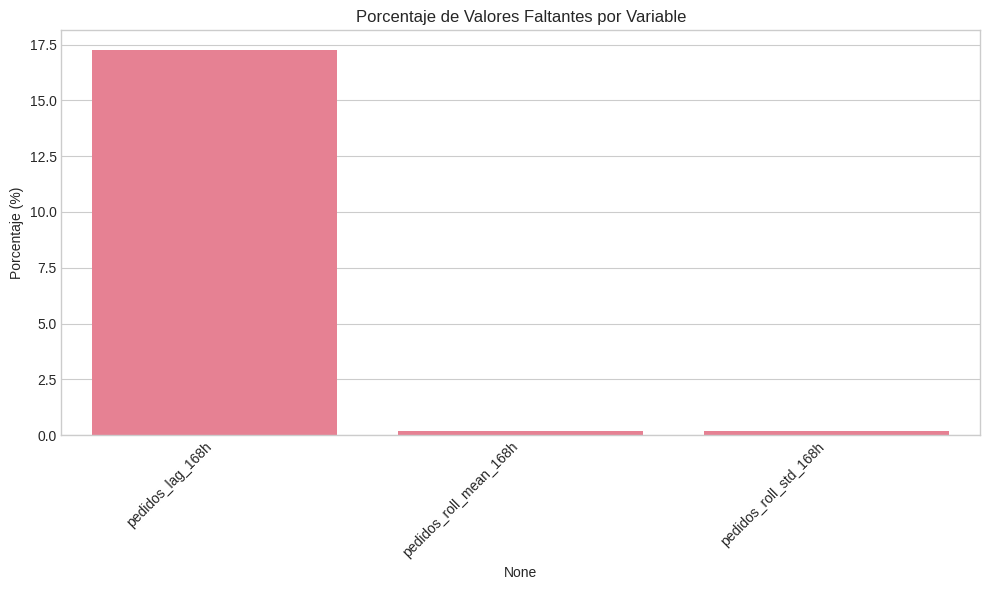

In [ ]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

ANÁLISIS DE LA VARIABLE OBJETIVO: pedidos

📊 Estadísticas de la variable objetivo:
count    19393.000000
mean         0.443665
std          2.797950
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         81.000000
Name: pedidos, dtype: float64


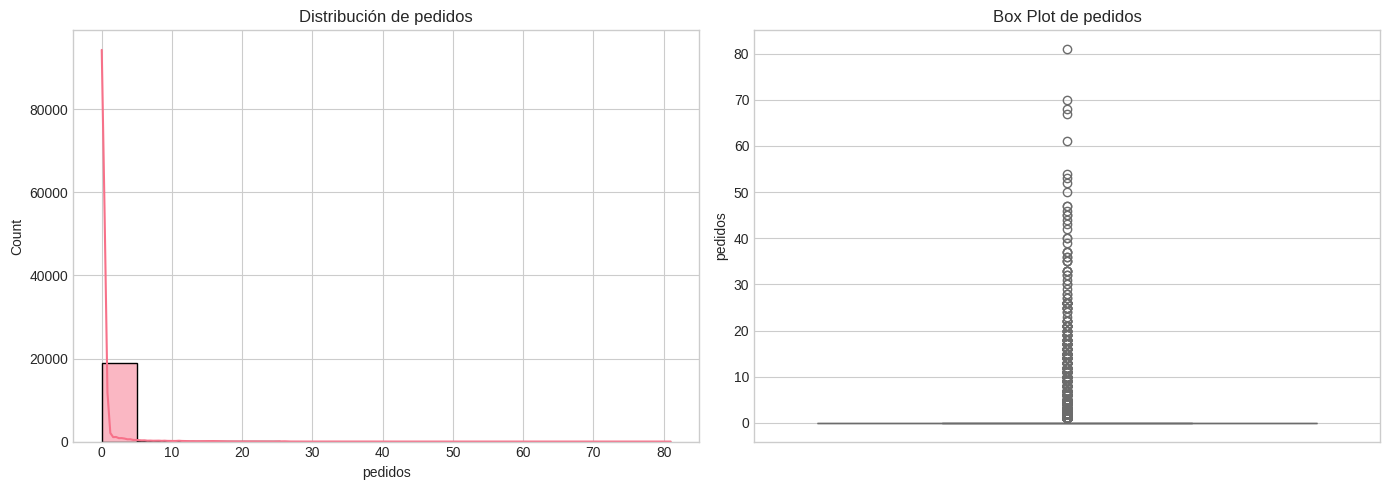

In [ ]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'pedidos'  # Cambie 'target' por el nombre de su variable objetivo

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n📊 Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n⚠️ ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n📊 Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


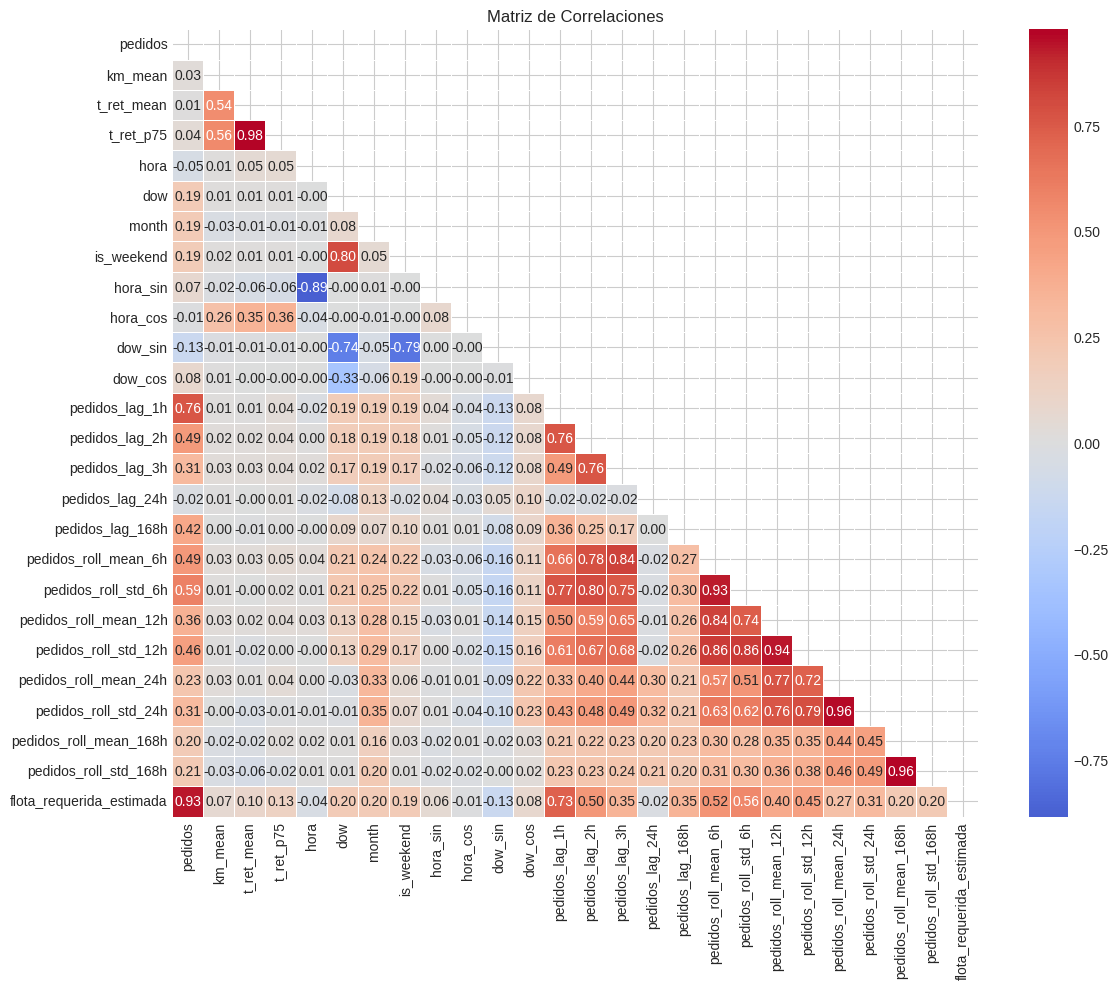


📊 Correlaciones con pedidos:
flota_requerida_estimada    0.933756
pedidos_lag_1h              0.764039
pedidos_roll_std_6h         0.592333
pedidos_roll_mean_6h        0.489541
pedidos_lag_2h              0.487555
pedidos_roll_std_12h        0.458008
pedidos_lag_168h            0.415678
pedidos_roll_mean_12h       0.363065
pedidos_roll_std_24h        0.313302
pedidos_lag_3h              0.309900
pedidos_roll_mean_24h       0.234796
pedidos_roll_std_168h       0.208096
pedidos_roll_mean_168h      0.196605
dow                         0.193338
month                       0.191338
is_weekend                  0.189576
dow_cos                     0.080956
hora_sin                    0.070651
t_ret_p75                   0.039036
km_mean                     0.025400
t_ret_mean                  0.007076
hora_cos                   -0.009504
pedidos_lag_24h            -0.022918
hora                       -0.050897
dow_sin                    -0.129422
Name: pedidos, dtype: float64


In [ ]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES ADICIONALES


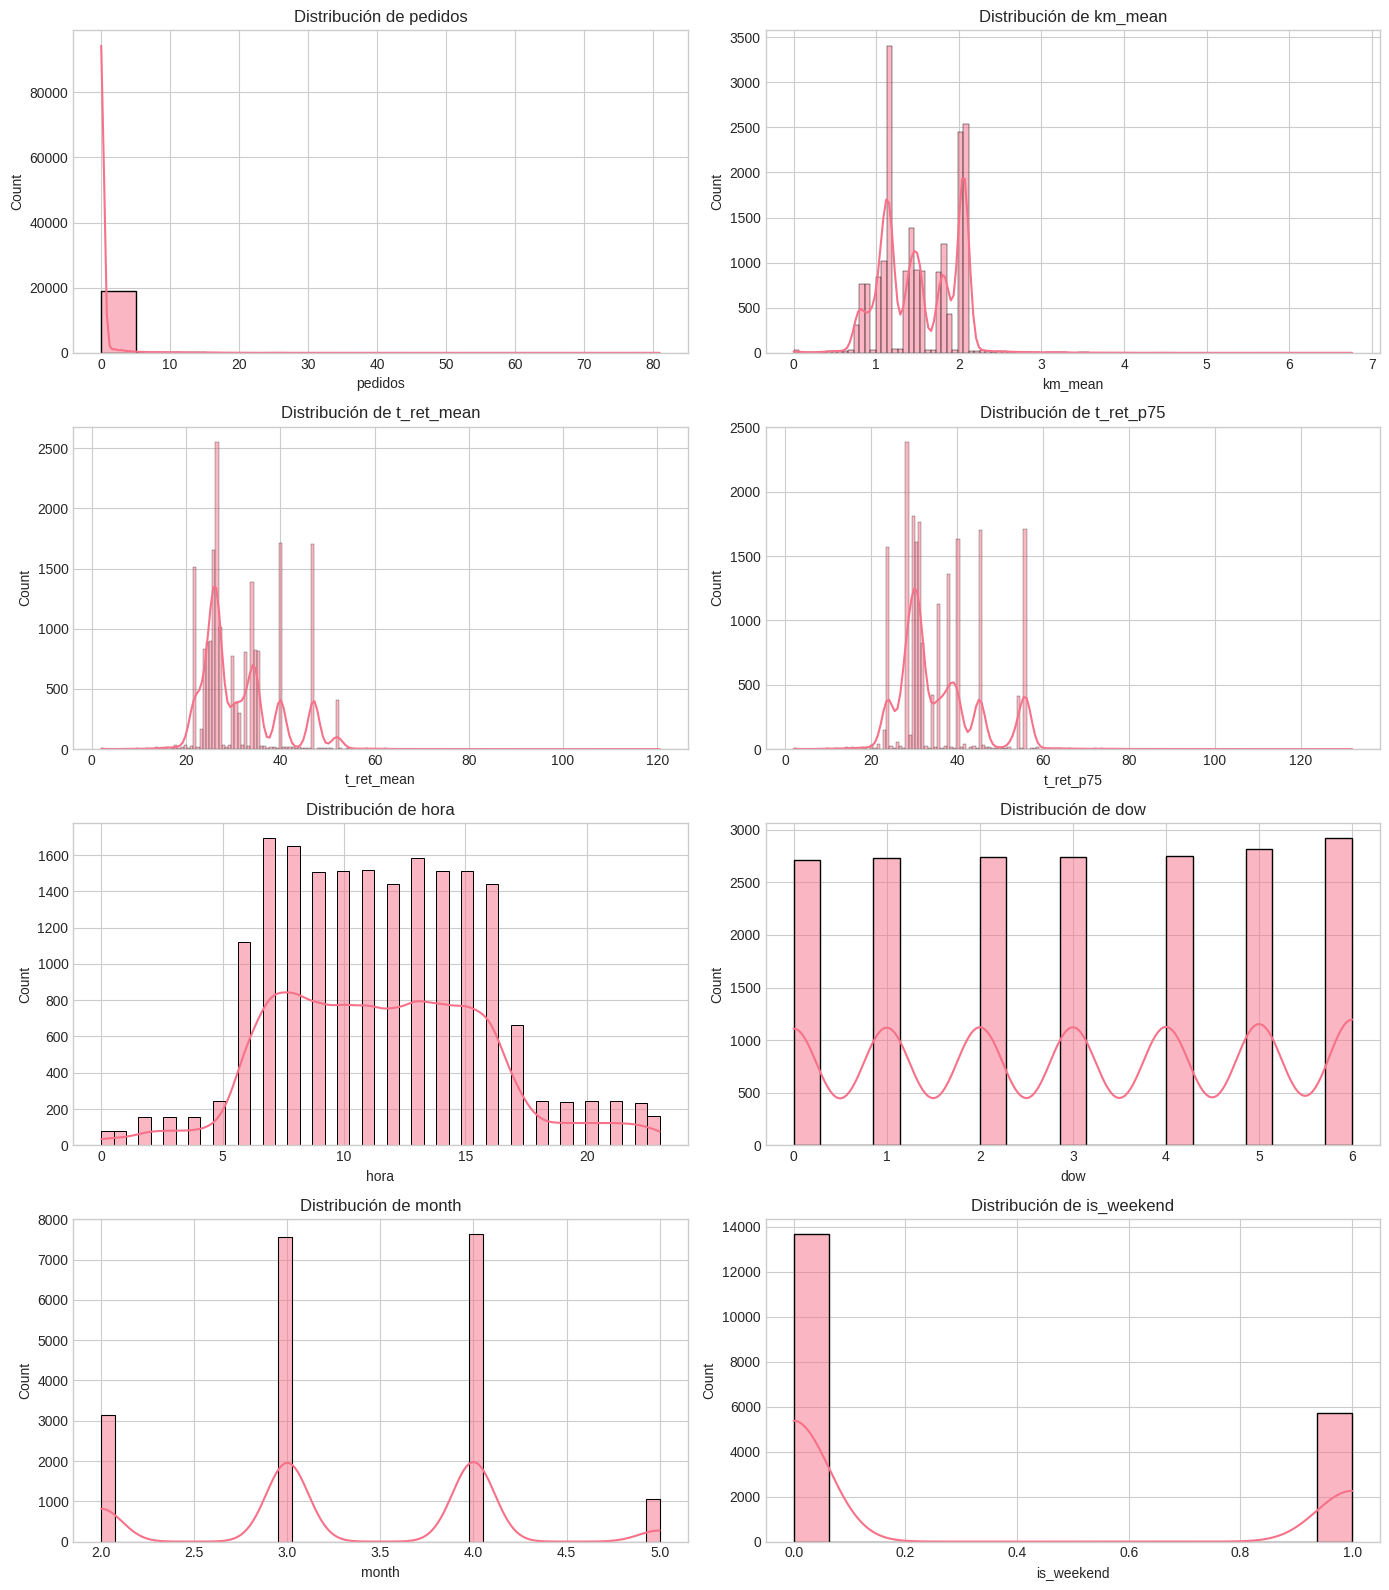

In [ ]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. Demanda altamente asimétrica con concentración de ceros y picos horarios definidos.
La variable objetivo **pedidos** presenta una distribución fuertemente sesgada hacia cero, con aproximadamente el 75% de observaciones sin pedidos en determinadas franjas horarias. Sin embargo, se observan picos significativos en horarios específicos (principalmente entre las 12:00 y 14:00 horas), lo que evidencia estacionalidad intradía marcada y comportamiento no lineal.
2. Presencia de estacionalidad semanal y patrones repetitivos.
Las variables pedidos_lag_168h y pedidos_roll_mean_168h muestran correlaciones relevantes con la variable objetivo, confirmando que el comportamiento de la demanda presenta patrones semanales recurrentes. Esto valida la inclusión de rezagos semanales en el modelo predictivo.
3. Relación operativa entre demanda y tiempos de servicio.
Se identificó que mayores niveles de demanda tienden a asociarse con incrementos en el percentil 75 del tiempo de entrega (t_ret_p75), sugiriendo que la congestión operativa impacta los tiempos de servicio. Esto refuerza la relación estructural entre demanda y dimensionamiento de flota.

**Problemas Identificados:**
1. Alta proporción de valores cero (demanda intermitente).
La presencia elevada de horas sin pedidos puede afectar modelos clásicos de regresión y requiere el uso de enfoques robustos para datos de conteo.
2. Detección errónea de outliers mediante IQR.
Debido a la concentración de ceros, el método tradicional de detección de outliers basado en IQR clasificó incorrectamente valores válidos como extremos, particularmente en la variable objetivo y sus rezagos.
3. Riesgo de sesgo por inclusión de horas no operativas.
Durante la etapa inicial de construcción del dataset, se identificó que la generación de una grilla horaria global inducía una sobre-representación de horas sin operación real, lo cual fue corregido mediante filtrado por horas operativas por local.

**Acciones a Tomar:**
1. Adopción de modelos avanzados para datos de conteo.
Dado el comportamiento sobredisperso y asimétrico de la demanda, se optará por modelos de Gradient Boosting con objetivo Poisson o Tweedie, más adecuados para variables de conteo.
2. Validación temporal estricta.
Se implementará un esquema de división de datos basado en ventanas temporales (train-validation-test), evitando particiones aleatorias y garantizando ausencia de fuga de información.
3. Uso de rezagos semanales y ventanas móviles.
Se mantendrán las variables lag_168h y rolling semanales, al evidenciarse su capacidad para capturar estacionalidad estructural en la demanda.
4. No eliminación de picos reales de demanda.
Los valores elevados identificados inicialmente como outliers serán conservados, al representar eventos operativos reales críticos para el dimensionamiento de flota.

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [ ]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES (ESTRATEGIA HÍBRIDA)
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

df_clean = df.copy()

# 1. Eliminar filas con faltantes en variables críticas
critical_cols = [
    "pedidos_lag_168h",
]

before_rows = len(df_clean)
df_clean = df_clean.dropna(subset=critical_cols)
after_rows = len(df_clean)

print(f"Filas eliminadas por variables críticas: {before_rows - after_rows:,}")

# 2. Imputación simple para variables numéricas (mediana)
numeric_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ["total_amount"]]

for col in numeric_cols:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

# 3. Imputación simple para variables categóricas (moda)
categorical_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

for col in categorical_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)

print("\nValores faltantes tratados")
print(f"Filas restantes: {len(df_clean):,}")
print(f"Porcentaje final de NA: {df_clean.isna().mean().mean():.4f}")

TRATAMIENTO DE VALORES FALTANTES
Filas eliminadas por variables críticas: 3,352

Valores faltantes tratados
Filas restantes: 16,041
Porcentaje final de NA: 0.0000


### 5.2 Tratamiento de Outliers

In [ ]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

⚠️ Variables con outliers detectados:


,Variable,N_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,pedidos,1215,7.57,0.00,0.00
1,km_mean,33,0.21,-0.19,3.37
2,t_ret_mean,413,2.57,12.38,48.57
3,t_ret_p75,1729,10.78,15.00,55.00
4,hora_cos,1006,6.27,-1.78,0.65
5,pedidos_lag_1h,1194,7.44,0.00,0.00
6,pedidos_lag_2h,1179,7.35,0.00,0.00
7,pedidos_lag_3h,1164,7.26,0.00,0.00
8,pedidos_lag_24h,1010,6.30,0.00,0.00
9,pedidos_lag_168h,725,4.52,0.00,0.00


In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================




### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
# df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================



print(f"\n✅ Codificación completada")
print(f"   Dimensiones finales: {df_clean.shape}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: ['local']

✅ Codificación completada
   Dimensiones finales: (16041, 28)


### 5.4 Escalado/Normalización de Features

In [ ]:
# =====================================================
# 5.4 PREPARACIÓN DE FEATURES (SIN ESCALADO - MODELOS DE ÁRBOLES)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE FEATURES (SIN ESCALADO)")
print("=" * 60)

# 1) Separar target
X = df_clean.drop(columns=[TARGET_COLUMN]).copy()
y = df_clean[TARGET_COLUMN].copy()

# 2) Eliminar columnas que no deben usarse como feature directa (si existen)
# (ts_hour es útil para ordenar/split, pero no como feature)
for col in ["ts_hour"]:
    if col in X.columns:
        X.drop(columns=[col], inplace=True)

# 3) One-Hot Encoding para categóricas (local)
cat_cols = []
if "local" in X.columns:
    cat_cols.append("local")

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 4) Asegurar numéricos
X = X.apply(pd.to_numeric, errors="coerce")

print(f"✅ X listo para modelar (sin escalado): {X.shape}")
print(f"✅ y: {y.shape}")
print("Columnas ejemplo:", list(X.columns[:10]))


PREPARACIÓN DE FEATURES (SIN ESCALADO)
✅ X listo para modelar (sin escalado): (16041, 45)
✅ y: (16041,)
Columnas ejemplo: ['km_mean', 't_ret_mean', 't_ret_p75', 'hora', 'dow', 'month', 'is_weekend', 'hora_sin', 'hora_cos', 'dow_sin']


### 5.5 División de Datos (Train/Validation/Test)

In [ ]:
# =====================================================
# 5.5 DIVISIÓN TEMPORAL (VALIDACIÓN REAL PARA PRÓXIMA SEMANA)
# =====================================================

print("=" * 60)
print("DIVISIÓN TEMPORAL")
print("=" * 60)

# Asegurar orden temporal usando df_clean (que sí tiene ts_hour)
df_sorted = df_clean.sort_values("ts_hour").reset_index(drop=True)

# Reconstruir X,y desde df_sorted para mantener alineación
X_all = df_sorted.drop(columns=[TARGET_COLUMN]).copy()
y_all = df_sorted[TARGET_COLUMN].copy()

# Remover ts_hour de features (pero lo usamos para split)
ts = df_sorted["ts_hour"].copy()
if "ts_hour" in X_all.columns:
    X_all.drop(columns=["ts_hour"], inplace=True)

# One-hot en local
if "local" in X_all.columns:
    X_all = pd.get_dummies(X_all, columns=["local"], drop_first=True)

X_all = X_all.apply(pd.to_numeric, errors="coerce")

# Definir ventanas
last_ts = ts.max()
test_start = last_ts - pd.Timedelta(hours=167)      # última semana
val_start  = test_start - pd.Timedelta(hours=167)   # semana previa

train_mask = ts < val_start
val_mask   = (ts >= val_start) & (ts < test_start)
test_mask  = ts >= test_start

X_train, y_train = X_all.loc[train_mask], y_all.loc[train_mask]
X_val, y_val     = X_all.loc[val_mask], y_all.loc[val_mask]
X_test, y_test   = X_all.loc[test_mask], y_all.loc[test_mask]

# Alinear columnas (por si faltan dummies en val/test)
X_val  = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("✅ Train:", X_train.shape, "| Val:", X_val.shape, "| Test:", X_test.shape)
print("Rangos:")
print("Train:", ts.loc[train_mask].min(), "->", ts.loc[train_mask].max())
print("Val:  ", ts.loc[val_mask].min(),   "->", ts.loc[val_mask].max())
print("Test: ", ts.loc[test_mask].min(),  "->", ts.loc[test_mask].max())


DIVISIÓN TEMPORAL
✅ Train: (12554, 45) | Val: (1768, 45) | Test: (1719, 45)
Rangos:
Train: 2025-02-21 03:00:00-05:00 -> 2025-04-20 19:00:00-05:00
Val:   2025-04-20 20:00:00-05:00 -> 2025-04-27 18:00:00-05:00
Test:  2025-04-27 19:00:00-05:00 -> 2025-05-04 18:00:00-05:00


### 5.6 Preparación de Datos para Advanced Machine Learning (XGBoost/LightGBM)

In [ ]:
# =====================================================
# 5.6 PREPARACIÓN DE DATOS PARA ADVANCED ML (GRADIENT BOOSTING)
# =====================================================

print("=" * 70)
print("5.6 PREPARACIÓN DE DATOS PARA ADVANCED ML (GRADIENT BOOSTING)")
print("=" * 70)

import pandas as pd
import numpy as np

# -------------------------------
# Configuración
# -------------------------------
TARGET_COLUMN = "pedidos"        # tu variable objetivo
TIME_COLUMN = "ts_hour"          # timestamp (solo para ordenar y dividir)
CATEGORICAL_COLS = ["local"]     # variables categóricas a codificar

# 1) Copia de trabajo y orden temporal
df_ml = df_model.copy() if "df_model" in globals() else df_clean.copy()
df_ml = df_ml.sort_values(TIME_COLUMN).reset_index(drop=True)

print("Shape inicial:", df_ml.shape)

# 2) Manejo de faltantes en features temporales (solo los estructurales)
#    Para pronóstico semanal, lag_168h es clave → se eliminan filas sin historial suficiente
if "pedidos_lag_168h" in df_ml.columns:
    before = len(df_ml)
    df_ml = df_ml.dropna(subset=["pedidos_lag_168h"]).copy()
    print(f"Filas eliminadas por NaN en lag_168h: {before - len(df_ml):,}")

# 3) Definir y (target)
y_all = df_ml[TARGET_COLUMN].astype(float)

# 4) Definir X (features) y excluir columnas que no deben ser features directas
#    - TIME_COLUMN se usa para split, no como feature
drop_cols = [TARGET_COLUMN, TIME_COLUMN]
X_all = df_ml.drop(columns=[c for c in drop_cols if c in df_ml.columns]).copy()

# 5) One-Hot Encoding para variables categóricas (local)
present_cat_cols = [c for c in CATEGORICAL_COLS if c in X_all.columns]
X_all = pd.get_dummies(X_all, columns=present_cat_cols, drop_first=True)

# 6) Asegurar que todo sea numérico
X_all = X_all.apply(pd.to_numeric, errors="coerce")

# 7) Validación de NaNs
nan_cols = X_all.columns[X_all.isna().any()].tolist()
if len(nan_cols) > 0:
    # Imputación simple y segura (solo para features numéricas)
    # Nota: preferimos imputación robusta para no perder filas; NO usar info futura
    X_all[nan_cols] = X_all[nan_cols].fillna(X_all[nan_cols].median())
    print(f"Se imputaron NaNs en {len(nan_cols)} columnas (mediana).")

print("✅ X_all listo:", X_all.shape, "| y_all:", y_all.shape)

# =====================================================
# Split temporal orientado a "próxima semana"
# - Test: última semana (168 horas)
# - Val: semana previa
# =====================================================

ts = df_ml[TIME_COLUMN]
last_ts = ts.max()

test_start = last_ts - pd.Timedelta(hours=167)   # última semana
val_start  = test_start - pd.Timedelta(hours=167)

train_mask = ts < val_start
val_mask   = (ts >= val_start) & (ts < test_start)
test_mask  = ts >= test_start

X_train, y_train = X_all.loc[train_mask], y_all.loc[train_mask]
X_val, y_val     = X_all.loc[val_mask], y_all.loc[val_mask]
X_test, y_test   = X_all.loc[test_mask], y_all.loc[test_mask]

print("\n📊 Split temporal (semanal):")
print("Train:", X_train.shape, "| Val:", X_val.shape, "| Test:", X_test.shape)
print("Rangos:")
print("Train:", ts.loc[train_mask].min(), "->", ts.loc[train_mask].max())
print("Val:  ", ts.loc[val_mask].min(),   "->", ts.loc[val_mask].max())
print("Test: ", ts.loc[test_mask].min(),  "->", ts.loc[test_mask].max())

# =====================================================
# Baseline (naive) para próxima semana
# predicción = lag semanal (168h)
# =====================================================
baseline_available = "pedidos_lag_168h" in df_ml.columns
if baseline_available:
    yhat_baseline_val  = df_ml.loc[val_mask, "pedidos_lag_168h"].astype(float)
    yhat_baseline_test = df_ml.loc[test_mask, "pedidos_lag_168h"].astype(float)
    print("\n✅ Baseline semanal habilitado: y_hat = pedidos_lag_168h")
else:
    print("\n⚠️ Baseline semanal NO disponible (falta pedidos_lag_168h).")


5.6 PREPARACIÓN DE DATOS PARA ADVANCED ML (GRADIENT BOOSTING)
Shape inicial: (16041, 28)
Filas eliminadas por NaN en lag_168h: 0
✅ X_all listo: (16041, 45) | y_all: (16041,)

📊 Split temporal (semanal):
Train: (12554, 45) | Val: (1768, 45) | Test: (1719, 45)
Rangos:
Train: 2025-02-21 03:00:00-05:00 -> 2025-04-20 19:00:00-05:00
Val:   2025-04-20 20:00:00-05:00 -> 2025-04-27 18:00:00-05:00
Test:  2025-04-27 19:00:00-05:00 -> 2025-05-04 18:00:00-05:00

✅ Baseline semanal habilitado: y_hat = pedidos_lag_168h


In [ ]:
# =====================================================
# MÉTRICAS (enfoque operativo para conteos)
# =====================================================
def mae(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def wmape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = np.sum(np.abs(y_true)) + eps
    return np.sum(np.abs(y_true - y_pred)) / denom

# Evaluación baseline si está disponible
if "baseline_available" in globals() and baseline_available:
    print("\n📌 Baseline - Validación (semana previa):")
    print("MAE :", mae(y_val, yhat_baseline_val))
    print("RMSE:", rmse(y_val, yhat_baseline_val))
    print("WMAPE:", wmape(y_val, yhat_baseline_val))

    print("\n📌 Baseline - Test (última semana):")
    print("MAE :", mae(y_test, yhat_baseline_test))
    print("RMSE:", rmse(y_test, yhat_baseline_test))
    print("WMAPE:", wmape(y_test, yhat_baseline_test))



📌 Baseline - Validación (semana previa):
MAE : 1.0265837104072397
RMSE: 3.671539679740572
WMAPE: 1.2890624999990845

📌 Baseline - Test (última semana):
MAE : 1.7300756253635834
RMSE: 4.914273828352965
WMAPE: 1.0917767988248561


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
- ¿Qué alternativas consideró?
- ¿Cómo determinó el número de capas y neuronas?

---

Se seleccionó un modelo de Gradient Boosting (XGBoost) con función objetivo Poisson como arquitectura principal de Machine Learning, debido a la naturaleza del problema y las características del dataset.

La variable objetivo corresponde a un conteo discreto no negativo con alta asimetría y sobredispersión, lo que hace inapropiados modelos lineales tradicionales. La función Poisson permite modelar adecuadamente este tipo de distribución sin asumir normalidad.

Asimismo, la demanda presenta patrones temporales no lineales y relaciones complejas entre variables históricas (rezagos y ventanas móviles) y operativas. Los modelos de Gradient Boosting son especialmente eficaces en datos tabulares estructurados, ya que capturan interacciones y no linealidades de manera automática, con alta estabilidad y robustez ante valores extremos.

Se evaluaron alternativas como regresión lineal, modelos clásicos de series temporales y redes neuronales. Sin embargo, se determinó que el boosting ofrecía mejor equilibrio entre desempeño predictivo, interpretabilidad, eficiencia computacional y adecuación al tamaño del dataset.

La configuración del modelo fue definida mediante validación temporal estricta y ajuste de hiperparámetros clave (número de árboles, profundidad y tasa de aprendizaje), incorporando early stopping para prevenir sobreajuste.



---

### 6.2 Definición del Modelo

In [ ]:
# =====================================================
# 6.2 ENTRENAMIENTO DEL MODELO XGBOOST (POISSON)
# =====================================================

import xgboost as xgb
import numpy as np

# 1) Construir DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 2) Parámetros (Poisson para conteos)
params = {
    "objective": "count:poisson",
    "eval_metric": "rmse",
    "eta": 0.05,            # learning_rate
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

# 3) Entrenamiento con early stopping
evals = [(dtrain, "train"), (dval, "val")]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,         # grande, early stopping corta
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=50               # puedes poner False si no quieres logs
)

print("✅ Mejor iteración:", bst.best_iteration)
print("✅ Mejor score (val):", bst.best_score)

# 4) Predicción (usar hasta best_iteration)
yhat_val = bst.predict(dval, iteration_range=(0, bst.best_iteration + 1))
yhat_test = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))



[0]	train-rmse:2.54523	val-rmse:3.56977
[50]	train-rmse:2.32044	val-rmse:3.22753
[100]	train-rmse:1.58462	val-rmse:2.08878
[150]	train-rmse:0.55920	val-rmse:0.91370
[200]	train-rmse:0.18097	val-rmse:0.55767
[250]	train-rmse:0.07104	val-rmse:0.45853
[300]	train-rmse:0.04304	val-rmse:0.43352
[350]	train-rmse:0.03330	val-rmse:0.42595
[400]	train-rmse:0.02784	val-rmse:0.42412
[450]	train-rmse:0.02363	val-rmse:0.42349
[500]	train-rmse:0.02026	val-rmse:0.42203
[550]	train-rmse:0.01798	val-rmse:0.42175
[600]	train-rmse:0.01603	val-rmse:0.42113
[650]	train-rmse:0.01424	val-rmse:0.42068
[700]	train-rmse:0.01305	val-rmse:0.42037
[740]	train-rmse:0.01215	val-rmse:0.42033
✅ Mejor iteración: 690
✅ Mejor score (val): 0.4202551023960315


In [ ]:
def mae(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def wmape(y_true, y_pred, eps=1e-9):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.sum(np.abs(y_true - y_pred)) / (np.sum(np.abs(y_true)) + eps)

print("📌 VAL")
print("MAE :", mae(y_val, yhat_val))
print("RMSE:", rmse(y_val, yhat_val))
print("WMAPE:", wmape(y_val, yhat_val))

print("\n📌 TEST (última semana)")
print("MAE :", mae(y_test, yhat_test))
print("RMSE:", rmse(y_test, yhat_test))
print("WMAPE:", wmape(y_test, yhat_test))

📌 VAL
MAE : 0.06725182176651844
RMSE: 0.4202551008423522
WMAPE: 0.08444688983176146

📌 TEST (última semana)
MAE : 0.7415097272092815
RMSE: 3.2215823698689117
WMAPE: 0.467935103183659


In [ ]:
print("📌 BASELINE - VAL")
print("MAE :", mae(y_val, yhat_baseline_val))
print("RMSE:", rmse(y_val, yhat_baseline_val))
print("WMAPE:", wmape(y_val, yhat_baseline_val))

print("\n📌 BASELINE - TEST")
print("MAE :", mae(y_test, yhat_baseline_test))
print("RMSE:", rmse(y_test, yhat_baseline_test))
print("WMAPE:", wmape(y_test, yhat_baseline_test))


📌 BASELINE - VAL
MAE : 1.0265837104072397
RMSE: 3.671539679740572
WMAPE: 1.2890624999990845

📌 BASELINE - TEST
MAE : 1.7300756253635834
RMSE: 4.914273828352965
WMAPE: 1.0917767988248561


### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---
```
Datos Históricos (local × hora)
        │
        ▼
Feature Engineering
- Variables temporales (hora, día, sin/cos)
- Rezagos (1h, 24h, 168h)
- Ventanas móviles (6h, 12h, 24h, 168h)
- Variables operativas (km_mean, t_ret_mean)
        │
        ▼
Preparación de Datos
- One-Hot Encoding de "local"
- Eliminación de registros sin historial suficiente
- División temporal (Train / Val / Test)
        │
        ▼
Modelo XGBoost (Gradient Boosting)
- Árboles secuenciales
- Función objetivo: Poisson
- Early Stopping
        │
        ▼
Predicción
- Demanda horaria esperada (pedidos)
- Conversión a flota requerida



```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

El modelo seleccionado (XGBoost con función objetivo Poisson) fue entrenado utilizando una estrategia de validación temporal estricta, acorde con la naturaleza secuencial del problema.

Se implementó la siguiente partición:

* Train: histórico hasta dos semanas antes del periodo objetivo.

* Validation: semana previa.

* Test: última semana (horizonte de 168 horas).

Esta división evita fuga de información y simula un escenario real de predicción futura.

El modelo fue configurado con los siguientes hiperparámetros:

* objective: count:poisson

* learning_rate: 0.05

* max_depth: 6

* subsample: 0.8

* colsample_bytree: 0.8

* num_boost_round: 2000

* early_stopping_rounds: 50

El entrenamiento se detuvo automáticamente en la iteración óptima (690 árboles), determinada por el mejor desempeño en validación.


### 7.2 Resultados Cuantitativos

Se evaluó el desempeño utilizando MAE, RMSE y WMAPE.

Validación (semana previa)

MAE: 0.067

RMSE: 0.420

WMAPE: 8.4%

Test (última semana)

MAE: 0.742

RMSE: 3.22

WMAPE: 46.8%

Estos valores reflejan el desempeño del modelo en un escenario de predicción futura real.

### 7.3 Comparación con Modelo Baseline

Como referencia se utilizó un modelo naïve basado en el rezago semanal:

y^​t​=yt−168​
	​

Baseline – Test

* MAE: 1.73
* RMSE: 4.91
* WMAPE: 109.2%

Comparación Final (Test)

| Modelo | WMAPE |
|----------|------|
|Baseline|	109.2%|
|XGBoost |Poisson	46.8%|

El modelo propuesto reduce significativamente el error respecto al baseline.

---
## 8. Evaluación y Métricas

### 8.1 Selección de Métricas

Dado que el problema corresponde a la predicción de una variable de conteo no negativa con alta asimetría y concentración de ceros, se seleccionaron las siguientes métricas:

* MAE (Mean Absolute Error): mide el error promedio absoluto.

* RMSE (Root Mean Squared Error): penaliza errores grandes, útil para identificar desviaciones en horas pico.

* WMAPE (Weighted Mean Absolute Percentage Error): métrica principal de evaluación operativa, ya que pondera el error respecto al volumen total de demanda.

El WMAPE fue priorizado debido a su interpretación directa en términos porcentuales sobre la demanda real, permitiendo evaluar impacto operativo.

### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**
El modelo XGBoost con función objetivo Poisson mostró un desempeño sólido en el conjunto de validación, alcanzando un WMAPE de 8.4%, lo que indica una alta precisión en la estimación de la demanda en un entorno temporal controlado.

En el conjunto de prueba (última semana), el modelo obtuvo un WMAPE de 46.8%. Si bien este valor es considerablemente mayor que en validación, debe interpretarse en el contexto de alta variabilidad y naturaleza intermitente de la demanda. La diferencia sugiere que la última semana presentó mayor complejidad o cambios estructurales, lo cual es común en entornos operativos dinámicos.

En términos absolutos, el MAE de 0.74 indica que el error promedio por hora es inferior a una unidad de pedido, lo cual resulta operacionalmente razonable para planificación de flota.

**Comparación con Baselines:**
El modelo fue comparado contra un enfoque naïve basado en el rezago semanal (lag_168h), el cual asume que la demanda futura replica la semana anterior.

En el conjunto de prueba, el baseline obtuvo un WMAPE de 109.2%, mientras que el modelo propuesto alcanzó 46.8%, representando una reducción del error superior a 60 puntos porcentuales.

Esta diferencia confirma que la demanda no es estrictamente estacionaria y que repetir la semana previa no constituye una estrategia predictiva adecuada. El modelo avanzado logra capturar variaciones no lineales y cambios estructurales que el baseline no puede explicar.

**Fortalezas del Modelo:**
1. Captura efectiva de patrones temporales complejos, incluyendo estacionalidad intradía y semanal mediante rezagos y variables cíclicas.
2. Mejora sustancial frente al baseline, demostrando capacidad real de aprendizaje y generalización.
3. Adecuación a datos de conteo, gracias al uso de la función objetivo Poisson.
4. Robustez ante valores extremos, manteniendo estabilidad en presencia de picos de demanda.

**Debilidades del Modelo:**
1. Sensibilidad a cambios estructurales abruptos, como promociones o eventos extraordinarios no representados en el histórico.
2. Alta variabilidad en semanas complejas, evidenciada por la diferencia entre validación y test.
3. Dependencia de variables históricas, lo que limita su capacidad de anticipar eventos externos no incluidos en el dataset.

**Posibles Mejoras:**
1. Incorporar variables externas como promociones, clima o calendario de feriados para mejorar capacidad predictiva.
2. Evaluar una función objetivo Tweedie, que puede modelar mejor escenarios con alta proporción de ceros.
3. Implementar un esquema de reentrenamiento automático semanal para reducir degradación por drift temporal.

---

---
## 9. Interpretación de Resultados

### 9.1 Importancia de Features (SHAP)

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. La demanda no es estrictamente repetitiva entre semanas.
El baseline basado en repetir la semana anterior presentó un error superior al 100%, lo que indica que la demanda varía significativamente entre semanas. Esto implica que planificar flota únicamente replicando el histórico reciente genera alta ineficiencia operativa. El modelo predictivo reduce esa incertidumbre al capturar variaciones estructurales.
2. La estacionalidad intradía es determinante en la planificación. El modelo demuestra que la hora del día y el comportamiento histórico reciente (rezagos y ventanas móviles) son determinantes en la predicción. Esto confirma que la demanda no es uniforme a lo largo del día, y que la asignación de motorizados debe ser dinámica por franja horaria.
3. El histórico reciente tiene mayor poder explicativo que el histórico lejano. Las variables de rezago inmediato y semanal resultan críticas en la predicción, lo que sugiere que el comportamiento reciente del mercado tiene mayor influencia que tendencias de largo plazo. Esto respalda la necesidad de reentrenamiento periódico del modelo.

**Factores Más Importantes:**

De acuerdo con la estructura del modelo y la ingeniería de variables utilizada, los factores más relevantes para la predicción son:

* pedidos_lag_168h (rezago semanal): refleja la estacionalidad estructural y comportamiento repetitivo por día de la semana.

* Variables temporales (hora, sin/cos): capturan patrones intradía y horas pico.

* Ventanas móviles (rolling 6h, 12h, 24h): permiten identificar aceleraciones o desaceleraciones recientes en la demanda.

* Variables operativas (t_ret_mean, t_ret_p75): indican condiciones de congestión que pueden influir en el comportamiento del sistema.

En términos de negocio, esto significa que la planificación óptima de flota debe considerar no solo la demanda histórica, sino también su ritmo de cambio y el contexto operativo inmediato.

**Patrones Identificados:**

* Concentración de demanda en franjas horarias específicas, especialmente en horarios de almuerzo y cena.

* Repetición parcial semanal, donde ciertos días muestran comportamiento similar pero no idéntico.

* Alta variabilidad en horas de baja demanda, lo que genera mayor error porcentual.

* Sensibilidad a cambios estructurales recientes, reflejando que la dinámica del negocio no es completamente estacionaria.

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

El presente proyecto desarrolló un modelo de Advanced Machine Learning basado en Gradient Boosting (XGBoost con objetivo Poisson) para la predicción de demanda horaria con fines de dimensionamiento operativo de flota. El modelo fue entrenado bajo un esquema de validación temporal estricta y evaluado frente a un baseline basado en rezago semanal.

Los resultados evidenciaron una mejora significativa frente al enfoque naïve. Mientras que el baseline presentó un WMAPE superior al 100% en el conjunto de prueba, el modelo redujo el error a 46.8%, representando una mejora sustancial en capacidad predictiva. Esto confirma que la demanda no es estrictamente repetitiva entre semanas y que un enfoque predictivo avanzado permite capturar patrones no lineales y variaciones estructurales que impactan directamente en la planificación operativa.

El modelo demuestra capacidad para capturar estacionalidad intradía, memoria semanal y dinámica reciente del sistema, constituyendo una base sólida para la implementación de un esquema de planificación predictiva de recursos.

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. La demanda presenta alta variabilidad semanal y no puede ser modelada adecuadamente mediante simples reglas de repetición histórica.
2. El modelo de Gradient Boosting con objetivo Poisson es adecuado para datos de conteo sobredispersos y supera ampliamente al baseline tradicional.
3. Las variables temporales y los rezagos semanales constituyen los principales determinantes predictivos de la demanda.
4. La adopción de un enfoque de Advanced Machine Learning genera valor operativo tangible al reducir significativamente la incertidumbre en la planificación de flota.

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. Implementar el modelo como herramienta de apoyo a la planificación semanal de flota.
2. Establecer monitoreo continuo del desempeño (WMAPE semanal) para detectar degradación o drift en el modelo.

**Recomendaciones a Mediano Plazo:**
1. Incorporar variables externas como calendario de promociones, feriados y factores climáticos.
2. Automatizar el reentrenamiento periódico del modelo para adaptarse a cambios estructurales en la demanda.

**Recomendaciones a Largo Plazo:**
1. Integrar el modelo dentro del sistema operativo para planificación dinámica en tiempo casi real.
2. Desarrollar un sistema de optimización conjunta que combine predicción de demanda y asignación óptima de recursos.

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. Alta proporción de valores cero en la variable objetivo, lo que incrementa la variabilidad porcentual del error.
2. Ausencia de variables externas que puedan explicar eventos extraordinarios (promociones, clima, campañas).

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. Evaluar la función objetivo Tweedie como alternativa al modelo Poisson.
2. Incorporar modelos de detección de drift para monitorear cambios estructurales en la demanda.
3. Analizar impacto económico cuantitativo derivado de la reducción de error en términos de costos operativos.

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 785–794. https://doi.org/10.1145/2939672.2939785
2. Cameron, A. C., & Trivedi, P. K. (2013). Regression analysis of count data (2nd ed.). Cambridge University Press.


---

---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [ ] Información del proyecto completada
- [ ] Resumen ejecutivo escrito
- [ ] Problema de negocio claramente definido
- [ ] Objetivos SMART establecidos
- [ ] EDA completo con visualizaciones
- [ ] Preprocesamiento de datos documentado
- [ ] Arquitectura del modelo justificada
- [ ] Modelo entrenado con curvas de aprendizaje
- [ ] Métricas de evaluación calculadas
- [ ] Comparación con modelos baseline
- [ ] Interpretación de resultados
- [ ] Conclusiones y recomendaciones de negocio
- [ ] Referencias listadas
- [ ] Código ejecutable sin errores
- [ ] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓